# Fazendo os imports necessários <a name="imports"></a>

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
import json

# Script para ler informação de compras e limpar os dados:
Para gerar uma tabela csv com os dados de compras, optei por copiar o texto com as informações e colocá-las no arquivo "compras.txt", e a partir desse arquivo, limpar as informações e escrevê-las em "psel_de_compras.csv".

In [2]:
from os.path import exists
if not exists(r'data/psel_de_compras.csv'):
    with open(r'data/psel_de_compras.csv', 'x') as file:
        with open(r'data/compras.txt', 'r') as compras:
            file.write('nome,show,consumo\n')
            text = compras.read().split(',')
            # As informações de preço de cada entrada estão
            # ligadas ao nome da próxima entrada, portanto
            # devemos separá-las:
            new_text = []
            for index, token in enumerate(text):
                if '.' in token:
                    token = token.split(' ', maxsplit=1)
                    new_text.append(token[0])
                    new_text.append(token[1])
                else:
                    new_text.append(token)
            # Escrevemos cada informação no arquivo:
            for info in new_text:
                # Caso haja um . na informação, ela se trata do consumo.
                # Sendo assim escrevemos ela no arquivo seguida por \n
                if '.' in info:
                    file.write(info + '\n')
                # Caso contrário, escrevemos a informação seguida de uma vírgula.
                else:
                    file.write(info + ',')


# Um outro método para coletar as informações de compras<a name="coleta-requests"></a>
O método a seguir faz uso do módulo "requests" para realizar um GET na página com as informações de compras e escrever o texto num arquivo csv.
Esse método requer que o módulo "requests" esteja instalado.

In [3]:
import requests

info_compras = requests.get('https://us-central1-raccoon-bi.cloudfunctions.net/psel_de_compras')

if not exists(r'data/psel_de_compras.csv'):
    with open(r'data/psel_de_compras.csv', 'x') as compras:
        compras.write(info_compras.text)

In [4]:
compras_df = pd.read_csv(r'data/psel_de_compras.csv')
ingressos_df = pd.read_json(r'data/psel_de_ingressos.json')
shows_df = pd.read_json(r'data/psel_de_shows.json')

- Tabela Compras - tabela contendo dados referentes a consumação das pessoas e
em quais shows.
- Tabela Ingressos - tabela de vendas de ingressos da Amazing Tickets contendo a
pessoa, a data do show e o status da compra.
- Tabela Show - tabela contendo as informações com o nome do Show e a data que
o mesmo aconteceu.

# Visualizando informações sobre nossos dados:

In [5]:
compras_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   nome     500 non-null    object 
 1   show     500 non-null    object 
 2   consumo  500 non-null    float64
dtypes: float64(1), object(2)
memory usage: 11.9+ KB


In [6]:
compras_df.head()

,nome,show,consumo
0,Joseph Wray,Symbolic Toy,3142.35
1,Barbara Mcneil,Symbolic Toy,2431.78
2,Eduardo Espenshade,Symbolic Toy,386.32
3,Lucia Hayes,Symbolic Toy,3373.49
4,Johnny Hairston,Symbolic Toy,2805.88


In [7]:
ingressos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ano     100 non-null    int64 
 1   dia     100 non-null    int64 
 2   mes     100 non-null    int64 
 3   nome    100 non-null    object
 4   status  100 non-null    object
 5   tipo    100 non-null    object
dtypes: int64(3), object(3)
memory usage: 4.8+ KB


In [8]:
ingressos_df.head()

,ano,dia,mes,nome,status,tipo
0,2020,1,1,Benjamin Mcdonald,Nao Concluido,VIP
1,2020,1,1,Mitchell Kostyla,Nao Concluido,VIP
2,2020,1,1,Gerald Allen,Nao Concluido,VIP
3,2020,1,1,Frederick Bank,Problema no Pagamento,VIP
4,2020,1,1,Tina Yee,Nao Concluido,VIP


In [9]:
shows_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, ano to mes
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Nascent Letter     3 non-null      int64
 1   Symbolic Toy       3 non-null      int64
 2   Terrestrial Chair  3 non-null      int64
dtypes: int64(3)
memory usage: 96.0+ bytes


In [10]:
shows_df = shows_df.transpose()

In [11]:
shows_df

,ano,dia,mes
Nascent Letter,2020,2,1
Symbolic Toy,2020,3,1
Terrestrial Chair,2020,1,1


In [12]:
consumo_clientes_pista = ingressos_df[(ingressos_df['status'] == 'Concluido') & (ingressos_df['tipo'] == 'Pista')]
consumo_clientes_pista

,ano,dia,mes,nome,status,tipo
35,2020,1,1,Donna Wal,Concluido,Pista
41,2020,1,1,Gretchen Hinojosa,Concluido,Pista
47,2020,2,1,Lyle Branch,Concluido,Pista
52,2020,2,1,John Rich,Concluido,Pista
53,2020,2,1,Courtney Edwards,Concluido,Pista
54,2020,3,1,Richard Culpepper,Concluido,Pista
55,2020,3,1,Young Besaw,Concluido,Pista
56,2020,3,1,Lucia Hayes,Concluido,Pista
58,2020,3,1,Marcela Nelson,Concluido,Pista
59,2020,3,1,Sandra Duncan,Concluido,Pista


In [13]:
shows = []
for index, item in consumo_clientes_pista.iterrows():
    if item['dia'] == 1:
        shows.append('Terrestrial Chair')
    elif item['dia'] == 2:
        shows.append('Nascent Letter')
    else:
        shows.append('Symbolic Toy')
consumo_clientes_pista['show'] = shows


C:\Users\bruno\AppData\Local\Temp\ipykernel_25232\3018671854.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumo_clientes_pista['show'] = shows


In [14]:
consumo_clientes_pista

,ano,dia,mes,nome,status,tipo,show
35,2020,1,1,Donna Wal,Concluido,Pista,Terrestrial Chair
41,2020,1,1,Gretchen Hinojosa,Concluido,Pista,Terrestrial Chair
47,2020,2,1,Lyle Branch,Concluido,Pista,Nascent Letter
52,2020,2,1,John Rich,Concluido,Pista,Nascent Letter
53,2020,2,1,Courtney Edwards,Concluido,Pista,Nascent Letter
54,2020,3,1,Richard Culpepper,Concluido,Pista,Symbolic Toy
55,2020,3,1,Young Besaw,Concluido,Pista,Symbolic Toy
56,2020,3,1,Lucia Hayes,Concluido,Pista,Symbolic Toy
58,2020,3,1,Marcela Nelson,Concluido,Pista,Symbolic Toy
59,2020,3,1,Sandra Duncan,Concluido,Pista,Symbolic Toy


In [15]:
consumo = []
for item in consumo_clientes_pista.itertuples():
    consumo.append(compras_df[(compras_df['nome'] == item[4]) & (compras_df['show'] == item[7])].consumo.values)

In [16]:
valores_consumo = [c for arr in consumo for c in arr]

# Questão 1 - Solução:

In [17]:
consumo_medio_pista = np.mean(valores_consumo)
consumo_medio_pista

2214.6885714285713

## Resposta:
### Clientes com ingresso do tipo "Pista" tiveram um consumo médio de 2214.68, aproximadamente.
---

In [18]:
# Pessoas que compraram ingresso na AT e compareceram:
# Pessoas que estao em compras_df e estao em ingressos_df
pessoas_presentes = compras_df['nome'].unique()
compradores_com_sucesso = ingressos_df[ingressos_df['status'] == 'Concluido'].nome.unique()

Pessoas que realizaram a compra com sucesso e compareceram aos shows:

In [19]:
compradores_presentes = set(pessoas_presentes[:-1]).intersection(set(compradores_com_sucesso))

In [20]:
compradores_presentes_df = compras_df[compras_df['nome'].isin(compradores_presentes)]

Pessoas que realizaram uma compra com sucesso mas não compareceram ao show:

In [21]:
compradores_ausentes = ingressos_df[~ingressos_df['nome'].isin(set(pessoas_presentes[:-1]))]

# Questão 2 - Solução:
Aqui temos as pessoas que compraram seus ingressos com sucesso pela Amazing Tickets, mas que não compareceram ao show:

In [22]:
compradores_ausentes[compradores_ausentes['status'] == 'Concluido']

,ano,dia,mes,nome,status,tipo
12,2020,1,1,Deborah Silsby,Concluido,VIP
25,2020,2,1,Frances Lambert,Concluido,VIP
53,2020,2,1,Courtney Edwards,Concluido,Pista
58,2020,3,1,Marcela Nelson,Concluido,Pista
59,2020,3,1,Sandra Duncan,Concluido,Pista
60,2020,3,1,Miguel Ramey,Concluido,Pista
69,2020,1,1,Ricardo Clasby,Concluido,Pista Premium
73,2020,1,1,Courtney Edwards,Concluido,Pista Premium
75,2020,1,1,Pamela Nixon,Concluido,Pista Premium
76,2020,1,1,Brenda Key,Concluido,Pista Premium


---
# Questão 3:

Vejamos agora quais pessoas não obtiveram sucesso em comprar ingressos na Amazing Tickets, mas ainda compareceram aos shows, ou seja, que compraram ingressos com concorrentes.

A solução da questão se encontra na variável compradores_sem_sucesso.

**É importante ter em mente que este conjunto engloba também as pessoas que nem sequer tentaram comprar os ingressos pela AT, além das pessoas que tentaram comprar pela AT mas desistiram.**

In [23]:
compradores_sem_sucesso = set(pessoas_presentes[:-1]) - set(compradores_com_sucesso)
compradores_sem_sucesso

{'Adelina Thews',
 'Alan Gravois',
 'Albert Fadden',
 'Alberto Gumm',
 'Allen Bylsma',
 'Allison Magill',
 'Amanda Jones',
 'Andrea Galyen',
 'Andrew Hoff',
 'Anna Hines',
 'Anthony King',
 'Anthony Nokes',
 'Arthur Steiner',
 'Belen Bradley',
 'Benjamin Mcdonald',
 'Benny Boisen',
 'Beth Evans',
 'Betty Lynch',
 'Betty Moore',
 'Beverly Redfern',
 'Blanche Knox',
 'Bobby Rick',
 'Brandy Barnes',
 'Brian Mann',
 'Brittney Birkey',
 'Bruce Hicks',
 'Bryan Rayford',
 'Caleb Munselle',
 'Candy Killough',
 'Carl Weber',
 'Carol Eash',
 'Carol Meeker',
 'Cassandra Gonsalves',
 'Catalina Berry',
 'Catherine Loos',
 'Charles Hershenson',
 'Chelsea Banter',
 'Cheryl West',
 'Chester Chavez',
 'Chris Wright',
 'Christopher Mueller',
 'Clarence Sharp',
 'Courtney Chapman',
 'Craig Wrisley',
 'Cynthia Daves',
 'Daniel Markell',
 'Daniel Puckett',
 'Danielle Gill',
 'Darrel Allmand',
 'David Pendergraph',
 'Debra Howard',
 'Denise Trapp',
 'Dennis Miller',
 'Derrick Collins',
 'Donald Williams',
 

Vamos escrever o conteúdo dessa variável num arquivo:

In [24]:
if not exists(r'data/compradores_sem_sucesso.txt'):
    with open(r'data/compradores_sem_sucesso.txt', 'w') as file:
        for index, comprador in enumerate(list(compradores_sem_sucesso)):
                file.write(comprador + '\n')

In [25]:
for nome in compradores_sem_sucesso:
    if len(ingressos_df[ingressos_df['nome'] == nome].status.values):
        print(
            compras_df[compras_df['nome'] == nome][['nome', 'consumo']].values[0], 
            ingressos_df[ingressos_df['nome'] == nome].status.values[0]
        )

['Debra Howard' 1998.8] Nao Concluido
['Margaret Robinson' 3148.62] Nao Concluido
['Benjamin Mcdonald' 2309.81] Nao Concluido
['Suzanne Herring' 3387.75] Problema no Pagamento
['Richard Jimenez' 1170.46] Nao Concluido
['Sabrina Graves' 1169.12] Nao Concluido
['Jeffrey Pace' 1454.98] Nao Concluido
['Kelly Williamson' 1202.18] Nao Concluido
['Joseph Wray' 3142.35] Problema no Pagamento
['Daniel Puckett' 1619.9] Nao Concluido
['Gerald Allen' 3447.17] Nao Concluido
['Maria Marshall' 3390.66] Problema no Pagamento
['Joshua Sanderson' 1103.17] Nao Concluido
['Blanche Knox' 2576.41] Nao Concluido
['Andrea Galyen' 828.95] Nao Concluido
['Edna Martinez' 1939.85] Problema no Pagamento
['Shayla Baird' 1613.1] Nao Concluido
['Emil Nord' 1564.02] Nao Concluido
['Charles Hershenson' 3337.29] Nao Concluido
['James Reaves' 2621.87] Problema no Pagamento
['William Barnes' 3110.89] Nao Concluido
['Jarrod Adler' 1213.95] Nao Concluido
['Larry Teague' 2887.19] Problema no Pagamento
['Frank Davilla' 3023.1

Podemos confirmar que essas pessoas compareceram aos shows com ingressos comprados em outro lugar ao olharmos suas entradas no nosso dataframe ingressos_df:

In [26]:
print(ingressos_df[ingressos_df['nome'] == 'Debra Howard'])
print(ingressos_df[ingressos_df['nome'] == 'Andrea Galyen'])
print(ingressos_df[ingressos_df['nome'] == 'Adelina Thews'])

     ano  dia  mes          nome                 status   tipo
38  2020    1    1  Debra Howard          Nao Concluido  Pista
39  2020    1    1  Debra Howard  Problema no Pagamento  Pista
     ano  dia  mes           nome         status   tipo
31  2020    3    1  Andrea Galyen  Nao Concluido    VIP
36  2020    1    1  Andrea Galyen  Nao Concluido  Pista
Empty DataFrame
Columns: [ano, dia, mes, nome, status, tipo]
Index: []


Note que a última entrada acima nos retornou um dataframe vazio. Isso se deve ao fato de que a pessoa em questão, Adelina Thews, estava presente nos shows mas nem sequer tentou comprar seus ingressos pela Amazing Tickets.

---
# Questão 4:
Vamos conferir qual dos 3 dias teve o maior gasto:

show
Nascent Letter       269765.88
Terrestrial Chair    319930.31
Symbolic Toy         330810.92
Name: consumo, dtype: float64


[Text(0, 0, 'Nascent Letter'),
 Text(1, 0, 'Terrestrial Chair'),
 Text(2, 0, 'Symbolic Toy')]

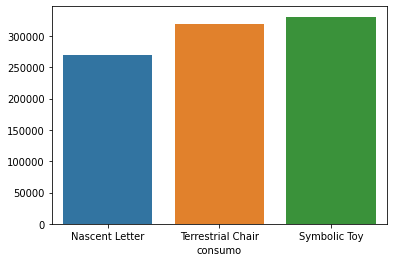

In [27]:
consumo_por_show = compras_df.groupby('show')['consumo'].sum().sort_values()
print(consumo_por_show)
fig = sns.barplot(data=consumo_por_show, x=consumo_por_show.index, y=consumo_por_show.values)
fig.set_xticklabels(consumo_por_show.index.values)

## Resposta:
Podemos ver pelo gráfico acima que no dia do show da banda Symbolic Toy houveram mais gastos do que nos outros dias, portanto o dia no qual houveram mais gastos foi o **dia 3**.

---
# Questão 5:

Já sabemos quem são as pessoas que compareceram aos shows com ingressos comprados fora da AT, pois temos seus nomes armazenados na variável ```compradores_sem_sucesso```. 

No entanto, essa variável contém tanto as pessoas que nunca tentaram comprar na AT, quanto as pessoas que desistiram de comprar lá. Estamos interessados somente naqueles que desistiram, portanto, vamos criar uma outra variável para guardar os nomes dessas pessoas:

Primeiro, vejamos quais pessoas conseguiram concluir suas compras:

In [ ]:
concluidos = set(ingressos_df[ingressos_df['status'] == 'Concluido'].nome.unique())
concluidos

Agora, vamos retirar do nosso dataset de ingressos todas as entradas que tenham um nome pertencente a nossa variável ```concluidos```:

In [50]:
desistentes = ingressos_df.drop(ingressos_df[ingressos_df['nome'].isin(concluidos)].index)

Com isso, temos os nomes de todas as pessoas que desistiram de comprar seus ingressos na Amazing Tickets:

In [51]:
ingressos_df[ingressos_df['nome'].isin(set(desistentes['nome'].unique()))]

,ano,dia,mes,nome,status,tipo
0,2020,1,1,Benjamin Mcdonald,Nao Concluido,VIP
2,2020,1,1,Gerald Allen,Nao Concluido,VIP
6,2020,1,1,Jeffrey Pace,Nao Concluido,VIP
8,2020,1,1,William Barnes,Nao Concluido,VIP
9,2020,1,1,Charles Hershenson,Nao Concluido,VIP
10,2020,1,1,Edna Martinez,Problema no Pagamento,VIP
13,2020,1,1,Nancy Smith,Nao Concluido,VIP
14,2020,1,1,Donna Chandler,Nao Concluido,VIP
17,2020,2,1,Maria Marshall,Problema no Pagamento,VIP
21,2020,2,1,Shayla Baird,Nao Concluido,VIP


Vamos conferir quais dessas pessoas compareceram aos shows:

In [54]:
consumo_desistentes = compras_df[compras_df['nome'].isin(desistentes['nome'].unique())]
consumo_desistentes

,nome,show,consumo
0,Joseph Wray,Symbolic Toy,3142.35
36,Margaret Robinson,Nascent Letter,3148.62
37,Shayla Baird,Nascent Letter,1613.10
84,Benjamin Mcdonald,Terrestrial Chair,2309.81
85,Gerald Allen,Terrestrial Chair,3447.17
...,...,...,...
465,Kelly Williamson,Terrestrial Chair,1697.67
466,Kelly Williamson,Terrestrial Chair,2211.27
467,Kelly Williamson,Terrestrial Chair,2765.24
486,Charles Hershenson,Nascent Letter,3337.29


Quanto cada desistente gastou no total:

In [56]:
consumo_total_por_desistente = consumo_desistentes.groupby('nome')['consumo'].sum()
consumo_total_por_desistente

nome
Andrea Galyen          5133.81
Benjamin Mcdonald      2309.81
Blanche Knox           3500.72
Charles Hershenson     3500.73
Daniel Puckett         5470.98
Debra Howard          11318.02
Edna Martinez         20602.77
Emil Nord              8352.80
Frank Davilla         11026.50
Gerald Allen           3447.17
James Reaves           8119.75
Jarrod Adler           5575.30
Jeffrey Pace           5810.78
Joseph Wray            3142.35
Joshua Sanderson       3982.22
Kelly Williamson      16054.33
Larry Teague          26145.45
Margaret Robinson      3148.62
Maria Marshall        10652.17
Richard Jimenez        4463.88
Sabrina Graves         1893.27
Shayla Baird           1613.10
Suzanne Herring        3387.75
William Barnes         8541.38
Name: consumo, dtype: float64

In [ ]:
consumo_total_por_desistente = consumo_total_por_desistente.to_frame().reset_index()

Por fim, vamos conferir os shows dos quais cada desistente se absteve de ir:

In [101]:
temp_df = ingressos_df[ingressos_df['nome'].isin(set(desistentes['nome'].unique()))]
shows = []
for index, item in temp_df.iterrows():
    if item['dia'] == 1:
        shows.append('Terrestrial Chair')
    elif item['dia'] == 2:
        shows.append('Nascent Letter')
    else:
        shows.append('Symbolic Toy')
temp_df['show'] = shows


C:\Users\bruno\AppData\Local\Temp\ipykernel_25232\3361551859.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['show'] = shows


In [102]:
temp_df

,ano,dia,mes,nome,status,tipo,show
0,2020,1,1,Benjamin Mcdonald,Nao Concluido,VIP,Terrestrial Chair
2,2020,1,1,Gerald Allen,Nao Concluido,VIP,Terrestrial Chair
6,2020,1,1,Jeffrey Pace,Nao Concluido,VIP,Terrestrial Chair
8,2020,1,1,William Barnes,Nao Concluido,VIP,Terrestrial Chair
9,2020,1,1,Charles Hershenson,Nao Concluido,VIP,Terrestrial Chair
10,2020,1,1,Edna Martinez,Problema no Pagamento,VIP,Terrestrial Chair
13,2020,1,1,Nancy Smith,Nao Concluido,VIP,Terrestrial Chair
14,2020,1,1,Donna Chandler,Nao Concluido,VIP,Terrestrial Chair
17,2020,2,1,Maria Marshall,Problema no Pagamento,VIP,Nascent Letter
21,2020,2,1,Shayla Baird,Nao Concluido,VIP,Nascent Letter


Vamos guardar o nome e consumo total de cada desistente:

In [93]:
desistentes_nome = consumo_total_por_desistente['nome'].values
desistentes_consumo_total = consumo_total_por_desistente['consumo'].values

Para ficar mais fácil de convertermos para JSON, criaremos uma classe ```Desistente``` para armazenar os nomes, gastos e shows de cada pessoa que desistiu:

In [179]:
class Desistente:
    def __init__(self, nome, gastos):
        self.nome = nome
        self.gastos = gastos
        self.shows = []

    def adicionar_show(self, show):
        self.shows.append(show)

    def achatar_lista(self):
        self.shows = self.shows[0]

In [180]:
lista_desistentes = []

for index, pessoa in enumerate(zip(desistentes_nome, desistentes_consumo_total)):
    lista_desistentes.append(Desistente(pessoa[0], pessoa[1]))

In [181]:
for desistente in lista_desistentes:
    desistente.adicionar_show(temp_df[temp_df['nome'] == desistente.nome]['show'].values.tolist())

In [182]:
for desistente in lista_desistentes:
    desistente.achatar_lista()

Vamos conferir que a formatação está correta:

In [183]:
for desistente in lista_desistentes:
    print(json.dumps(desistente.__dict__))

{"nome": "Andrea Galyen", "gastos": 5133.8099999999995, "shows": ["Symbolic Toy", "Terrestrial Chair"]}
{"nome": "Benjamin Mcdonald", "gastos": 2309.81, "shows": ["Terrestrial Chair"]}
{"nome": "Blanche Knox", "gastos": 3500.72, "shows": ["Terrestrial Chair"]}
{"nome": "Charles Hershenson", "gastos": 3500.73, "shows": ["Terrestrial Chair"]}
{"nome": "Daniel Puckett", "gastos": 5470.98, "shows": ["Terrestrial Chair"]}
{"nome": "Debra Howard", "gastos": 11318.02, "shows": ["Terrestrial Chair", "Terrestrial Chair"]}
{"nome": "Edna Martinez", "gastos": 20602.77, "shows": ["Terrestrial Chair", "Nascent Letter"]}
{"nome": "Emil Nord", "gastos": 8352.8, "shows": ["Nascent Letter"]}
{"nome": "Frank Davilla", "gastos": 11026.5, "shows": ["Nascent Letter"]}
{"nome": "Gerald Allen", "gastos": 3447.17, "shows": ["Terrestrial Chair"]}
{"nome": "James Reaves", "gastos": 8119.75, "shows": ["Nascent Letter", "Terrestrial Chair", "Nascent Letter"]}
{"nome": "Jarrod Adler", "gastos": 5575.3, "shows": ["

Por fim, vamos armazenar essas informações num arquivo:

In [184]:
if not exists(r'data/relatorio_desistentes.json'):
    with open(r'data/relatorio_desistentes.json', 'x') as relatorio_desistentes:
        for desistente in lista_desistentes:
            relatorio_desistentes.write(json.dumps(desistente.__dict__))